#### Name : Bhavik Modi
#### Email : bmodi700@gmail.com

# Problem Statement: 
### Predict whether income exceeds $50K/yr based on census data.

Steps Taken for Solution ⁉
1. Perform EDA
* EDA.html   
Prepared HTML interactive Charts for all possible analysis

*  Prepared PDF file for charts

2. Prepare Model


*   Used Auto Sklearn and Trained it for 10 mint



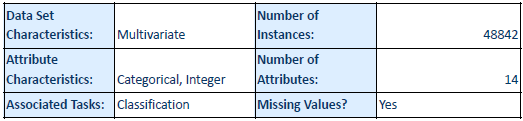

## Library Imports

In [ ]:
!pip install sweetviz

In [1]:
import pandas as pd
import numpy as np
from scipy import stats 

import plotly.express as px
import sweetviz as sv
import pandas_profiling as pp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import style
import seaborn as sns

from datetime import datetime
import pytz
import time
import os

In [32]:
from autosklearn import regression,classification
import sklearn
from sklearn.model_selection import train_test_split
import autosklearn
from autosklearn.metrics import r2 as auto_r2, mean_squared_error as auto_mse 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,make_scorer,confusion_matrix,f1_score,accuracy_score

## 1. Data Loading

In [3]:
master_df=pd.read_csv("/content/adult.csv",na_values=' ?')

In [4]:
master_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
(master_df.isna().sum()/len(master_df['age']))*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
country           1.790486
salary            0.000000
dtype: float64

## 2. EDA Analysis

### 2.1 Dynamic Plot software

In [24]:
### Plot handling functions

def convert_dtype(input_df,input_dict):
    """
    Use : Change data type as per requirement
    Return : DataFrame with corrected dType
    """
    output_df = input_df.astype(input_dict,)
    return output_df


def html_handler(input_str,filename,folder_name):
    """
    Use : Create / Update HTML file
    Return : None
    """ 
    
    try:
        with open(f"{folder_name}/{filename}.html",'a') as file:
            file.write(f"<h2 align ='center' style='color:red'> {input_str} </h2>")
            file.write("""<form> <input type="button" value="Go back!" onclick="history.back()"> </form>""")
    except Exception as e:
        pass
    return None


def plotly_to_html(fig,filename,folder_name):
    """
    Use : Store Plotly plot HTML file
    Return : None
    """
    
    try:
        with open(f"{folder_name}/{filename}.html", 'a') as f:
            f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
    except Exception as e:
        pass
        
    return None

def html_create_index(input_str,filename,folder_name):
    """
    Use : Create index file for all the plotly plot
    Return : None
    """
    parent_name=folder_name.split("/")[0]    
    #logging.info(f"html_create_index called to create {folder_name}/{filename}.html and {parent_name}/EDA.html ")
    

    try:
        if os.path.exists(f"{parent_name}/EDA.html"):
            with open(f"{parent_name}/EDA.html",'a') as file:
                file.write(f"<li><a href={filename}/{filename}.html>{input_str}</a></li>")
        else:
            with open(f"{parent_name}/EDA.html",'a') as file:
                file.write(f"<h1 align ='center' style='color:red'> Complete EDA </h1>")
                file.write(f"<li><a href={filename}/{filename}.html>{input_str}</a></li>")


        with open(f"{folder_name}/{filename}.html",'a') as file:
            file.write(f"<h1 align ='center' style='color:red'> {input_str} </h1>")
            file.write("""<form> <input type="button" value="Go back!" onclick="history.back()"> </form>""")

        for f in os.listdir(f"{folder_name}"):
            if f.endswith('.html') and f!=f"{filename}.html":
                with open(f"{folder_name}/{filename}.html",'a') as file:
                    f_href=f.replace(" ","%20")
                    file.write(f"<li><a href={f_href}>{f}</a></li>")
            else:
                pass
    except Exception as e:
        pass

    return None

In [25]:
##*****************************************************************************************  
## ************************* Function for Categorical Target Variavble ************************


## ******Categorical Vs. Categorical Target variable

def cat_cat_var_plot(df,target_col,filename="Graph4",path="Graph4"):
    """
    Use : Create HTML Plot file for Categorical Vs. Categorical Target Variable
    and combine it with overall EDA graph HTML
    Return : None
    """
    
    path=f"DynamicPlot/{path}"
    if not os.path.exists(path):
        os.makedirs(path) 
    
    try:
        categorical_var_list=df.select_dtypes(include=["object"])
        for column in categorical_var_list:
            html_handler(input_str=column,filename=column,folder_name=path)
            inp_df=df.groupby(column)[target_col].count().reset_index(name=f'{column} : Count')
            
            try:
                
                fig1 = px.bar(inp_df, x=column, y=f'{column} : Count',color=column,
                        barmode="group",title=f'{column} : Count Plot')
                fig1=fig1.update_layout(title_x=0.5,
                                        title_font_family="Times New Roman",
                                        title_font_color="black",title_font_size=20)       
                plotly_to_html(fig=fig1,filename=column,folder_name=path)
            except Exception as e:
                pass

            try:
                
                inp_df=df.groupby([target_col,column])[[target_col]].count().rename(columns={target_col:f"{target_col}_count"})
                inp_df=inp_df.reset_index()
                fig2 = px.bar(inp_df, x=target_col, 
                                y=f'{target_col}_count',color=column,
                                barmode="group",title=f'{column} :Stacked Count Plot')
                fig2=fig2.update_layout(title_x=0.5,title_font_family="Times New Roman",
                                        title_font_color="black",title_font_size=20)
                plotly_to_html(fig=fig2,filename=column,folder_name=path)
            except Exception as e:
                pass

            try:
                
                inp_df=df.groupby(column)[target_col].count().reset_index(name=f'{column} : Count')
                fig3=px.pie(inp_df, values=f'{column} : Count', names=column, title=f'{column} : Pie Chart')
                fig3=fig3.update_traces(textposition='inside', textinfo='percent+label')
                fig3=fig3.update_layout(title_x=0.5,title_font_family="Times New Roman",title_font_color="black",
                            title_font_size=20)
                plotly_to_html(fig=fig3,filename=column,folder_name=path)
            except Exception as e:
                pass         

    except Exception as e:
                pass

    html_create_index(input_str="Categorical Variable Analysis",filename="Graph4",folder_name=path)
    
    return None

## ******Numerical Vs. Categorical Target variable

def num_cat_var_plot(df,target_col,filename="Graph5",path="Graph5"):
    """
    Use : Create HTML Plot file for Numerical Vs. Categorical Target Variable
    and combine it with overall EDA graph HTML
    Return : None
    """
    

    path=f"DynamicPlot/{path}"
    
    if not os.path.exists(path):
        os.makedirs(path) 
    

    try:
        numerical_var_list=df.select_dtypes(exclude=["object"])
        for column in numerical_var_list:
            
            html_handler(input_str=column,filename=column,folder_name=path)
            try:
                
                fig1=px.histogram(df, x=column,marginal="violin",
                                    hover_data=df.columns,title=f'{column} : Histogram Plot')
                fig1=fig1.update_layout(title_x=0.5,title_font_family="Times New Roman",
                                        title_font_color="black",title_font_size=20)        
                plotly_to_html(fig=fig1,filename=column,folder_name=path)
            except Exception as e:
                pass

            try:
                
                fig2=px.violin(df, y=column, points='all', box=True,title=f'{column} : Violin Plot')
                fig2=fig2.update_layout(title_x=0.5,title_font_family="Times New Roman",
                                title_font_color="black",title_font_size=20)
                plotly_to_html(fig=fig2,filename=column,folder_name=path)
            except Exception as e:
                pass

            try:
                
                fig3=px.violin(df, x=target_col,y=column,color=target_col, points='all', box=True,title=f'{column} : Violin Plot')
                fig3=fig3.update_layout(title_x=0.5,title_font_family="Times New Roman",
                                title_font_color="black",title_font_size=20)        
                plotly_to_html(fig=fig3,filename=column,folder_name=path)
            except Exception as e:
                pass

            try:
                
                inp_df=df.groupby(target_col)[column].agg(["mean","median"]).reset_index().rename(columns={'mean': f'Mean : {column}','median':f'Median : {column}'})
                fig4 = px.bar(inp_df, x=target_col, y=[f'Mean : {column}',f'Median : {column}'],
                        barmode="group",title=f'{column} : Mean Plot')
                fig4=fig4.update_layout(title_x=0.5,title_font_family="Times New Roman",
                                        title_font_color="black",title_font_size=20)
                plotly_to_html(fig=fig4,filename=column,folder_name=path) 
            except Exception as e:
                pass

    except Exception as e:
                pass
    
    html_create_index(input_str="Numerical Variable Analysis",filename="Graph5",folder_name=path)
    

    return None
    

## ******Null Vs. Categorical Target variable
def null_cat_var_plot(df,target_col,filename="Graph6",path="Graph6"):
    """
    Use : Create HTML Plot file for Null Vs. Categorical Target Variable
    and combine it with overall EDA graph HTML
    Return : None
    """
    

    path=f"DynamicPlot/{path}"

    if not os.path.exists(path):
        os.makedirs(path)

    try:
        null_var_list=df.columns[df.isnull().any()].tolist()
        null_var_list.append(target_col)
        null_df=df[null_var_list]

        for column in null_df.iloc[:,:-1]:
            
            html_handler(input_str=column,filename=column,folder_name=path)

            null_df[column]=np.where(null_df[column].isnull(),"Null","Not Null")
            inp_df=null_df.groupby(column)[target_col].count().reset_index()

            try:
                
                fig1 = px.bar(inp_df, x=column, y=target_col,color=column,
                                barmode="group",title=f'{column} : Null Value Count Plot')
                fig1=fig1.update_layout(title_x=0.5,title_font_family="Times New Roman",
                                title_font_color="black", title_font_size=15)
                plotly_to_html(fig=fig1,filename=column,folder_name=path)
            except Exception as e:
                pass

    except Exception as e:
                pass
    
    html_create_index(input_str="Null Value Analysis",filename="Graph6",folder_name=path)
    



##*****************************************************************************************  
## ************************* Multivariate Analysis ************************

def mul_var_plot(df,target_col,filename="Graph7",path="Graph7"):
    """
    Use : Create HTML Plot file for Multivariate Analysis
    and combine it with overall EDA graph HTML
    Return : None
    """
    
    path=f"DynamicPlot/{path}"
    if not os.path.exists(path):
        os.makedirs(path) 

    html_handler(input_str=f"Multivariate Analysis : Target Variable {target_col}",filename=filename,folder_name=path)

    

    try:
        #numerical_var_list=df.select_dtypes(exclude=["object"])
        corr_df = df.corr()
        corrSale_df=pd.DataFrame(corr_df[target_col])
        corrSale_df.reset_index(inplace=True)
        corrSale_df.sort_values(by=target_col,ascending=True,inplace=True)
        corrSale_df.dropna(inplace=True)
        corrSale_df.columns=["Feature","Pearson_Corr"]
        
        fig1 = px.bar(corrSale_df, y="Feature", x="Pearson_Corr",
                        color="Pearson_Corr",
                        barmode="group",
                        title=f'Correlation Plot-1 : Target Variable {target_col}')
        fig1=fig1.update_layout(title_x=0.5,
                                title_font_family="Times New Roman",
                                title_font_color="black",
                                title_font_size=20)
        plotly_to_html(fig=fig1,filename=filename,folder_name=path)
    except Exception as e:
                pass
    try:
        
        fig2=px.imshow(corr_df, text_auto=True, 
                        aspect="auto",
                        title=f'Correlation Plot-2 : Target Variable {target_col}')
        fig2=fig2.update_layout(title_x=0.5,
                            title_font_family="Times New Roman",
                            title_font_color="black",
                            title_font_size=20)
        plotly_to_html(fig=fig2,filename=filename,folder_name=path)
    except Exception as e:
                pass

    html_create_index(input_str="Multivariate Analysis : Target Variable",filename="Graph7",folder_name=path)


##*****************************************************************************************  
## ************************* SWEETVIZ and PANDAS PROFILING ********************************

def SweetViz_report(df,filename="Graph8",path="Graph8"):
    """
    Use : Create HTML plot using SweetViz
    and combine it with overall EDA graph HTML
    Return : None
    """
    

    path=f"DynamicPlot/{path}"
    if not os.path.exists(path):
        os.makedirs(path) 
    
    try:
        
        #html_handler(input_str="SweetViz Report",filename="SweetViz",folder_name=path)
        my_report=sv.analyze(df,feat_cfg=None)
        my_report.show_html(f"{path}/{filename}.html",open_browser=False)
        html_create_index(input_str="SweetViz Report",filename=filename,folder_name=path)
        #feature_config = sv.FeatureConfig(skip="", force_text=[""])
        #Compare Two DataFrame i.e. e.g. Test vs Training sets
        #my_report = sv.compare()
        # Comparing two subsets of the same dataframe (i.e. Male vs Female)
        #  my_report = sv.compare_intra()
    except Exception as e:
                pass
    return None


def PandaProfile_report(df,target_col,filename="Graph9",path="Graph9",minimal_ip=False):
    """
    Use : Create HTML plot using PandaProfiling
    and combine it with overall EDA graph HTML
    Return : None
    For Big data turn --> minimal_ip=True
    """
    
    path=f"DynamicPlot/{path}"
    if not os.path.exists(path):
        os.makedirs(path) 
    
    try:
        
        #html_handler(input_str="PandaProfiling Report",filename="PandaProfiling",folder_name=path)
        profile = pp.ProfileReport(df,title="PandaProfiling Report",explorative=True,minimal=minimal_ip)
        # minimal=True -->> For Big Dataset
        profile.to_file(f"{path}/{filename}.html")
        html_create_index(input_str="PandaProfiling Report",filename=filename,folder_name=path)
    except Exception as e:
        pass
    return None

In [26]:
cat_cat_var_plot(master_df,target_col="salary",filename="Graph4",path="Graph4")
num_cat_var_plot(master_df,target_col="salary",filename="Graph5",path="Graph5")
null_cat_var_plot(master_df,target_col="salary",filename="Graph6",path="Graph6")
SweetViz_report(master_df,filename="Graph8",path="Graph8")
PandaProfile_report(master_df,target_col="salary",filename="Graph9",path="Graph9",minimal_ip=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:158: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                                             |          | [  0%]   00:00 -> (? left)

Report DynamicPlot/Graph8/Graph8.html was generated.


In [31]:
!zip -r /content/Static.zip /content/StaticPlot
#!rm -rf DynamicPlot
#!rm -rf StaticPlot

  adding: content/StaticPlot/ (stored 0%)
  adding: content/StaticPlot/cat_cat_var_plot25-06-22_1544.pdf (deflated 13%)
  adding: content/StaticPlot/null_cat_var_plot25-06-22_1544.pdf (deflated 53%)
  adding: content/StaticPlot/num_cat_var_plot25-06-22_1544.pdf (deflated 8%)


### 2.2 Static Graph function

In [28]:
def plot_size(graphsize):
    """
    Use : Plot size selection
    Return : Plot/Fig. Size
    """
    ## (Width*Height)
    if graphsize=="A4":
        fig_size=(11,8.5)
    elif graphsize=="A3" :
        fig_size=(16.5,12)
    elif graphsize=="mid":
        fig_size=(24,14)
    elif graphsize=="big":
        fig_size=(30,17.5)
    else:
        fig_size=(30,17.5) # By-Default big size
    
    return fig_size



## ******Categorical Vs. Categorical Target variable
def cat_cat_var_plot(df,target_col,graphsize="big",plot_style="ggplot"):
    """
    Use : Create PDF Plot file for
    Categorical Vs. Categorical Target Variable
    Return : None

    Graphsize=A4,A3,mid,big default=big
    #print(plt.style.available)
    """ 
    style.use(plot_style)
    
    path="StaticPlot"

    if not os.path.exists(path):
        os.makedirs(path)

    pdf_file_name= f"{path}/cat_cat_var_plot" + datetime.now(pytz.timezone('Asia/Kolkata')).strftime("%d-%m-%y_%H%M") + ".pdf"   
    graph_pdf = PdfPages(pdf_file_name)
    
 
    
    try:
        categorical_var_list=df.select_dtypes(include=["object"])

        for column in categorical_var_list:    
            work_figure = plt.figure(constrained_layout=False, figsize=plot_size(graphsize))
            grid = gridspec.GridSpec(ncols=2, nrows=2, figure=work_figure)

            try:
                
                ax1 = work_figure.add_subplot(grid[0,0]) ## 1st Row, 1 Column
                ax1.set_title(column.upper() + ' : Count Plot')
                sns.countplot(x=column,data = df,
                            order = df[column].value_counts().index,ax = ax1)
                plt.xticks(rotation=90)
                for p in ax1.patches:
                    ax1.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.2, p.get_height()+2))
            except Exception as e:
                    pass

            try:
                
                ax2 = work_figure.add_subplot(grid[1, 0]) ## 2 nd Row, 1 Column
                ax2.set_title(column.upper() + ' : Stack Column Plot ')
                sns.countplot(x=column,data = df,
                            order = df[column].value_counts().index,
                            hue=target_col,ax = ax2)
                for p in ax2.patches:
                    ax2.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.2, p.get_height()+2))
                #df_plot = df.groupby([target_col,column]).size().reset_index().pivot(columns=target_col, index=column, values=0)
                #df_plot.plot(kind='bar', stacked=True,ax = ax2)
                plt.xticks(rotation=90)
            except Exception as e:
                pass


            try: 
                    
                ax3 = work_figure.add_subplot(grid[:, 1]) ## Entire 2nd Column >>  [:, 1] This use complete Second Column
                df[column].value_counts().plot.pie(autopct = "%2.2f%%", ax=ax3)
                ax3.set_title(column.upper() + ' : Pie Plot')
            except Exception as e:
                pass

            work_figure.tight_layout()
            #plt.show()
            
            graph_pdf.savefig(work_figure)

    except Exception as e:
        pass

    graph_pdf.close()

    return None


## ******Numerical Vs. Categorical Target variable
def num_cat_var_plot(df,target_col,graphsize="big",plot_style="ggplot"):
    """
    Use : Create PDF Plot file for
    Numerical Vs. Categorical Target Variable
    Return : None

    Graphsize=A4,A3,mid,big default=big
    #print(plt.style.available)
    """
    
    
    style.use(plot_style)
    
    path="StaticPlot"

    if not os.path.exists(path):
        os.makedirs(path)

    pdf_file_name= f"{path}/num_cat_var_plot" + datetime.now(pytz.timezone('Asia/Kolkata')).strftime("%d-%m-%y_%H%M") + ".pdf"   
    graph_pdf = PdfPages(pdf_file_name)
    
 
    try:
        numerical_var_list=df.select_dtypes(exclude=["object"])
        for column in numerical_var_list:
            work_figure = plt.figure(constrained_layout=False, figsize=plot_size(graphsize))## Width , Height
            grid = gridspec.GridSpec(ncols=2, nrows=2, figure=work_figure)

            try:
                
                ax1 = work_figure.add_subplot(grid[0, :1])
                ax1.set_title(column.upper()+': Density Plot')
                sns.distplot(df[column],ax = ax1)
            except Exception as e:
                pass


            try:
                
                ax2 = work_figure.add_subplot(grid[1, :1])
                plt.hist(data = df,x=column)
                plt.title(column.upper()+' : Histogram',ax = ax2)
            except Exception as e:
                pass

            try:
                
                ax3 = work_figure.add_subplot(grid[0, 1])
                sns.boxplot(df[column], ax=ax3)
                plt.title(column.upper() + " : Box Plot")
            except Exception as e:
                pass

            try:
                
                ax4 = work_figure.add_subplot(grid[1, 1])
                ax4.set_title(column.upper() + ' : Box Plot ')
                sns.boxplot(x=target_col, y=column, data = df,
                            order = df[target_col].value_counts().index,ax=ax4)
                plt.xticks(rotation=90)
            except Exception as e:
                pass

            work_figure.tight_layout() 
            #plt.show()
            
            graph_pdf.savefig(work_figure)

    except Exception as e:
        pass

    graph_pdf.close()

    return None


## ******Null Vs. Categorical Target variable
def null_cat_var_plot(df,target_col,graphsize="big",plot_style="ggplot"):
    """
    Use : Create PDF Plot file for
    Null Vs. Categorical Target Variable
    Return : None

    Graphsize=A4,A3,mid,big default=big
    #print(plt.style.available)
    """
    
    
    style.use(plot_style)
    
    path="StaticPlot"

    if not os.path.exists(path):
        os.makedirs(path)

    pdf_file_name= f"{path}/null_cat_var_plot" + datetime.now(pytz.timezone('Asia/Kolkata')).strftime("%d-%m-%y_%H%M") + ".pdf"   
    graph_pdf = PdfPages(pdf_file_name)
    

    try:
        for column in df:
            df_temp=df.copy()
            df_temp[column]=np.where(df[column].isnull(),"Null","Not Null")
            grouped_data=df_temp.groupby(column)[target_col]
            
        if (df[column].isnull().sum()>=1):     
            work_figure = plt.figure(constrained_layout=False, figsize=plot_size(graphsize))
            grid = gridspec.GridSpec(ncols=2, nrows=2, figure=work_figure)

            try:
                
                ax1 = work_figure.add_subplot(grid[0,0]) ## 1st Row, 1 Column
                ax1.set_title(column.upper() + ' : Null Value COUNT Analysis')
                grouped_data.count().plot.bar(ax = ax1)
                for p in ax1.patches:
                    ax1.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.2, p.get_height()+2))
            except Exception as e:
                pass

            try:
                
                ax2 = work_figure.add_subplot(grid[0,1])
                ax2.set_title(column.upper() + ' : Null Value Count Analysis')
                
                Null_val_per=f"Null Value % : {np.round(df[column].isnull().mean()*100,2)}" 

                ax2.text(0.5,0.5,Null_val_per,
                        horizontalalignment='left',
                        verticalalignment='center',
                        transform = ax2.transAxes,color='b', weight='bold',fontsize = 15)  
            except Exception as e:
                pass

            try:
                
                ax3 = work_figure.add_subplot(grid[1,0])
                ax3.set_title('Not Applicable')
            except Exception as e:
                pass
            
            try:
               
                ax4 = work_figure.add_subplot(grid[1,1])
                ax4.set_title('Not Applicable')
            except Exception as e:
                pass
            
            work_figure.tight_layout(pad=10, w_pad=10, h_pad=10.0)
            #plt.show()
            
            graph_pdf.savefig(work_figure) #papertype=graphsize

    except Exception as e:
        pass

    graph_pdf.close()

    return None


In [ ]:
cat_cat_var_plot(master_df,target_col="salary",graphsize="A3",plot_style="ggplot")
num_cat_var_plot(master_df,target_col="salary",graphsize="A3",plot_style="ggplot")
null_cat_var_plot(master_df,target_col="salary",graphsize="A3",plot_style="ggplot")

In [ ]:
!zip -r /content/StaticPlot.zip /content/DynamicPlot

### 2.3 Observations based on EDA graphs

**For detailed EDA refer Inreractive HTML file and PDF graph file**

Prpbablity of earning >50 K if folloing status :


*   Husband
*   Residing in US (90 % of people
*   Married-Cil-Spouse
*   White race
* Prof-Speciality and Craft Repair occupation
* Male
* Fed-Gov. employee


## 3. Building Model

### Model using AutoSklearn

In [7]:
#!pip install auto-sklearn

In [ ]:
## Imputing Null values using KNN imputer
#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=2)
#master_df_imputed = imputer.fit_transform(master_df)

In [35]:
## replacing Null values with NAN

master_df["workclass"].fillna(master_df["workclass"].mode()[0], inplace=True)
master_df["occupation"].fillna(master_df["occupation"].mode()[0], inplace=True)
master_df["country"].fillna(master_df["country"].mode()[0], inplace=True)

In [36]:
X=master_df.drop("salary",axis=1)
one_hot_encoded_data = pd.get_dummies(X, columns = ['workclass', 'education','marital-status','occupation','relationship','race','sex','country'])
y=master_df["salary"]
y=y.replace(" >50K",1)
y=y.replace(" <=50K",0)

In [37]:
y=master_df["salary"]
y=y.replace(" >50K",1)
y=y.replace(" <=50K",0)

In [38]:
X_train,X_val,y_train,y_val = train_test_split(one_hot_encoded_data,y,test_size=0.3,random_state=42)

In [40]:
automl = classification.AutoSklearnClassifier(
    time_left_for_this_task=60*10,
    per_run_time_limit=2*60)
    
#scoring_functions=[auto_r2,auto_mse],

In [41]:
automl.fit(X_train, y_train)

AutoSklearnClassifier(per_run_time_limit=120, time_left_for_this_task=600)

In [ ]:
# summarize
print(automl.sprint_statistics())

In [ ]:
pd.DataFrame(automl.leaderboard(detailed = True, ensemble_only=False))

In [ ]:
## This Give all the model details
from pprint import pprint
pprint(automl.show_models(),indent=4)

In [ ]:
## This gives Selected Model
pprint(automl.get_models_with_weights(),indent=4)

In [ ]:
## Cross Validation results
pd.DataFrame(automl.cv_results_)

##4. Predicting

In [42]:
train_pred = automl.predict(X_train)
test_pred = automl.predict(X_val)

In [43]:
print("F1 Score for Validation Data",f1_score(y_val, test_pred))
print("F1 Score for Training Data",f1_score(y_train, train_pred))

F1 Score for Validation Data 0.7071797278273111
F1 Score for Training Data 0.7666797488226059


In [45]:
print("Accuracy Score for Validation Data",accuracy_score(y_val, test_pred))
print("Accuracy Score for Validation Data",accuracy_score(y_train, train_pred))

Accuracy Score for Validation Data 0.8722489507626164
Accuracy Score for Validation Data 0.8956651456651457


## 5. RESULTS

## F1 Score for Validation Data 0.7071797278273111
## F1 Score for Training Data 0.7666797488226059

## Accuracy Score for Validation Data 0.8722489507626164
## Accuracy Score for Validation Data 0.8956651456651457